# (Week 5) Capstone Project - The Battle of Neighborhoods (Week 2)

## IDENTIFYING THE BEST LOCATION FOR YOGEN FRÜZ FRANCHISE

### 1 - Pre-Processing

In [2]:
# importing necessary libraries
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import json 

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# !conda install -c conda-forge geocoder
# !conda install -c conda-forge/label/gcc7 geocoder
# !conda install -c conda-forge/label/cf201901 geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values


from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install pgeocode
import pgeocode
!pip install geocoder
print('geocoder has been installed before.')
import geocoder
print('geocoder has been successfully imported.')
import warnings
warnings.filterwarnings('ignore')

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                       

## Getting the Data of 5 most populace cities of Pakistan 

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_37cc78cb1a8d45b7aebe354322bc7856 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='VsmrG4t1PRb-69FsXZFn5MWFlCikQfc1rB4y_l5Up4uP',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_37cc78cb1a8d45b7aebe354322bc7856.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-0cofa7lu2znq8m',Key='pk.json')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object 

if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# Since JSON data can be semi-structured and contain additional metadata, it is possible that you might face an error during data loading.
# Please read the documentation of 'pandas.read_json()' and 'pandas.io.json.json_normalize' to learn more about the possibilities to adjust the data loading.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
# and http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.json.json_normalize.html

df_data_1 = pd.read_json(body, orient='columns')


In [4]:
df_data_1.rename(columns = {'admin':'Province', 'capital':'Capital', 'city':'City', 
                            'country':'Country', 'iso2':'Code', 'lat':'Latitude', 'lng':'Longitude', 
                            'population':'Population', 'population_proper':'Total Population'}, 
                 inplace = True)

In [5]:
df_data_1['Population'].replace('', np.nan, inplace=True)
df_data_1['Total Population'].replace('', np.nan, inplace=True)
df_data_1.dropna(subset=['Population'], inplace=True)
df_data_1.dropna(subset=['Total Population'], inplace=True)
df_data_1.head(5)

Province Capital        City   Country Code   Latitude  \
0               Sindh   admin     Karachi  Pakistan   PK  24.905600   
1              Punjab   admin      Lahore  Pakistan   PK  31.549722   
2              Punjab   minor  Faisalābād  Pakistan   PK  31.416667   
3  Khyber Pakhtunkhwa               Serai  Pakistan   PK  34.739330   
4              Punjab   minor  Rāwalpindi  Pakistan   PK  33.597331   

   Longitude Population Total Population  
0  67.082200   12130000         11624219  
1  74.343611    6577000          6310888  
2  73.083333    2617000          2506595  
3  72.335655    1860310          1860310  
4  73.047904    1858000          1743101

## The geographical coordinates of Lahore

In [6]:
address = 'Lahore, Pakistan'

geolocator = Nominatim(user_agent="lahore_explorer")
location = geolocator.geocode(address, timeout=10000)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lahore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Lahore are 31.5656079, 74.3141775.


## The Map of Lahore

In [7]:
map_pak = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_data_1['Latitude'], df_data_1['Longitude'], df_data_1['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=2,
        parse_html=False).add_to(map_pak)  
    
map_pak

## Importing the Neighborhoods/Towns/UC's of Lahore

In [8]:

body = client_37cc78cb1a8d45b7aebe354322bc7856.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-0cofa7lu2znq8m',Key='Lahore.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.rename(columns={'Area Name':'Neighborhood'}, 
                 inplace=True)

In [9]:
df3 = df_data_0.copy()
df3

Neighborhood  Postal Code   Latitude  Longitude
0                         BATA PUR        53400  33.238200  72.834700
1             C.M.A. CANTT. LAHORE        54800  31.576100  74.424700
2            FEROZEPUR ROAD LAHORE        54600  31.488800  74.368600
3                     HARBANS PURA        54850  31.576100  74.424700
4                        KAHNA NAU        53100  31.369200  74.365300
5             LAHORE CANTT. G.P.O.        54810  31.576100  74.424700
6   LAHORE DEFENCE HOUSING SOICETY        54792  31.481100  74.316400
7              LAHORE ISMAIL NAGAR        54760  31.451749  74.343023
8                MODEL TOWN LAHORE        54700  31.484400  74.324400
9                          TAJPURA        54870  31.561545  74.397274
10                        TOWNSHIP        54770  31.449379  74.290708
11                           WAGHA        53600  31.600830  74.558052
12               AITCHESON COLLEGE        54030  31.551728  74.344053
13                          ALFLAH        54020  31.480809  74.412262
14                    AWAN COLONEY        54780  31.507932  74.258842
15                     BAGHBANPURA        54920  31.224200  74.099700
16                     BAHRIA TOWN        53720  31.365070  74.145976
17                         BALLOKI        55210  31.188976  73.874344
18                           BARKI        53200  31.047800  74.085000
19                      CHAH MIRAN        54900  31.464900  74.384600
20                         CHUHANG        53800  31.433100  74.174200
21                           JALLO        53500  31.574575  74.490081
22                 KOHINOOR ENERGY        55160  31.263199  74.185293
23        LAHORE ALLAMA IQBAL TOWN        54570  31.511292  74.266660
24        LAHORE E.M.E Society P.O        53710  31.438946  74.191477
25   LAHORE ENGINEERING UNIVERSITY        54890  31.576100  74.424700
26                    LAHORE G.P.O        54000  31.488800  74.368600
27              LAHORE MULTAN ROAD        54500  31.488800  74.368600
28    LAHORE NEW UNIVERSITY CAMPUS        54590  31.488800  74.368600
29   LAHORE PMG PUNJAB POST OFFICE        54560  31.488800  74.368600
30             LAHORE PT & T AUDIT        54550  31.488800  74.368600
31    LAHORE PUNJAB GOVERNOR HOUSE        54880  31.576100  74.424700
32          LAHORE SECONDARY BOARD        54650  31.488800  74.368600
33  LAHORE SHADMAN WOMEN MODEL P.O        54610  31.535632  74.320718
34                     MANGA MANDI        55270  31.304400  74.063600
35                        MANSOORA        54790  31.492752  74.264180
36                      MOGHALPURA        54840  31.576100  74.424700
37                        NAULAKHA        54010  31.579618  74.325044
38                 NIAZ BEG THOKAR        53700  31.442500  73.883000
39                         RAIWIND        55150  31.254400  74.217800
40                SHAH ALAM MARKET        54100  31.577423  74.315594
41                   SHAHDARA BAGH        54950  31.464900  74.384600
42                  SHAHI MOHALLAH        54110  31.586012  74.307484
43                   TIMBER MARKET        54120  31.599041  74.299059
44                      JOHAR TOWN        54782  31.460567  74.221317
45                      WAPDA TOWN        54770  31.431934  74.244238
46                      GREEN TOWN        53101  31.433985  74.302484
47                     FAISAL TOWN        54770  31.476407  74.296872
48                         KAMAHAN        53101  31.434082  74.383294
49                     GULBERG III        54660  31.504952  74.325749
50                      GULBERG II        54660  31.526404  74.339798
51                       GULBERG I        54660  31.530969  74.342183

In [10]:
map_lahore_uc = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, local in zip(df3['Latitude'], df3['Longitude'], df3['Neighborhood']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_lahore_uc)  
    
map_lahore_uc

## Foursquare API to explore the Neighborhood Clusters

In [11]:
# function to repeat the exploring process to all the neighborhoods in Lahore
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=1000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [12]:
# define Foursquare Credentials and Version
CLIENT_ID = 'B0CESWGK3Y3JJAZDOSBNUX5GTO5J5U3U1R4J3NWWZGAEX4XB' # your Foursquare ID
CLIENT_SECRET = '43CFX53PH1N5LSXHTFY3W02HVNL10QJVUWZC2RPUCEAR2XHR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: B0CESWGK3Y3JJAZDOSBNUX5GTO5J5U3U1R4J3NWWZGAEX4XB
CLIENT_SECRET:43CFX53PH1N5LSXHTFY3W02HVNL10QJVUWZC2RPUCEAR2XHR


In [13]:
# Set Venue Limit and Radius
LIMIT=100
radius=1000

In [14]:
df_lahore = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000)

In [15]:
df_lahore.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     BATA PUR                33.2382                 72.8347   
1     BATA PUR                33.2382                 72.8347   
2     BATA PUR                33.2382                 72.8347   
3     BATA PUR                33.2382                 72.8347   
4     BATA PUR                33.2382                 72.8347   

                       Venue  Venue Latitude  Venue Longitude  \
0  Chakri North Service Area       33.320310        72.783147   
1               Chakri South       33.320198        72.785054   
2               Chakri South       33.319935        72.785256   
3                     C Mart       33.320407        72.785002   
4           Chakri North CNG       33.320312        72.783462   

      Venue Category  
0        Gas Station  
1          Rest Area  
2  Food & Drink Shop  
3  Convenience Store  
4        Gas Station

In [16]:
df_lahore.shape

(4354, 7)

In [17]:
df_lahore = df_lahore[df_lahore.duplicated(subset=['Venue','Venue Latitude','Venue Longitude'], keep=False)]
df_lahore.sort_values(by=['Venue'],inplace=True,ascending=False)
df_lahore=df_lahore.dropna()
print('There are {} services/shops counted as being in more than 1 neighborhood'.format(len(df_lahore)))

There are 2648 services/shops counted as being in more than 1 neighborhood


In [18]:
df_lahore["Venue Category"].value_counts()

Housing Development         182
Factory                     152
Office                      120
Bakery                       91
Mosque                       74
Automotive Shop              65
Café                         59
Pakistani Restaurant         58
Building                     57
Bank                         56
Hospital                     55
BBQ Joint                    45
Event Space                  41
Salon / Barbershop           40
Fast Food Restaurant         38
Furniture / Home Store       37
Clothing Store               34
Breakfast Spot               34
Department Store             32
University                   31
Doctor's Office              30
Asian Restaurant             26
Ice Cream Shop               25
Farm                         25
Bookstore                    24
Student Center               24
Burger Joint                 23
Convenience Store            23
Auto Dealership              22
Pharmacy                     22
                           ... 
Watch Sh

## Analysis of Each Neighborhood in Lahore

In [19]:
# One Hot Encode the Categorical Variables
lahore_onehot = pd.get_dummies(df_lahore[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
lahore_onehot['Neighborhood'] = df_lahore['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [lahore_onehot.columns[-1]] + list(lahore_onehot.columns[:-1])
lahore_onehot = lahore_onehot[fixed_columns]

lahore_onehot.head(10)

Neighborhood  Accessories Store  Adult Education Center  \
3494  SHAHI MOHALLAH                  0                       0   
3532   TIMBER MARKET                  0                       0   
3592   TIMBER MARKET                  0                       0   
3481  SHAHI MOHALLAH                  0                       0   
3541   TIMBER MARKET                  0                       0   
3437  SHAHI MOHALLAH                  0                       0   
3483  SHAHI MOHALLAH                  0                       0   
3559   TIMBER MARKET                  0                       0   
3563   TIMBER MARKET                  0                       0   
3445  SHAHI MOHALLAH                  0                       0   

      Afghan Restaurant  Airport Gate  Alternative Healer  \
3494                  0             0                   0   
3532                  0             0                   0   
3592                  0             0                   0   
3481                  0             0                   0   
3541                  0             0                   0   
3437                  0             0                   0   
3483                  0             0                   0   
3559                  0             0                   0   
3563                  0             0                   0   
3445                  0             0                   0   

      American Restaurant  Aquarium  Arts & Crafts Store  Asian Restaurant  \
3494                    0         0                    0                 0   
3532                    0         0                    0                 0   
3592                    0         0                    0                 0   
3481                    0         0                    0                 0   
3541                    0         0                    0                 0   
3437                    0         0                    0                 0   
3483                    0         0                    0                 0   
3559                    0         0                    0                 0   
3563                    0         0                    0                 0   
3445                    0         0                    0                 0   

      ...  Travel & Transport  Travel Agency  Turkish Restaurant  University  \
3494  ...                   0              0                   0           0   
3532  ...                   0              0                   0           0   
3592  ...                   0              0                   0           0   
3481  ...                   0              0                   0           0   
3541  ...                   0              0                   0           0   
3437  ...                   0              0                   0           0   
3483  ...                   0              0                   0           0   
3559  ...                   0              0                   0           0   
3563  ...                   0              0                   0           0   
3445  ...                   0              0                   0           0   

      Video Store  Warehouse  Watch Shop  Water Park  Wedding Hall  \
3494            0          0           0           0             0   
3532            0          0           0           0             0   
3592            0          0           0           0             0   
3481            0          0           0           0             0   
3541            0          0           0           0             0   
3437            0          0           0           0             0   
3483            0          0           0           0             0   
3559            0          0           0           0             0   
3563            0          0           0           0             0   
3445            0          0           0           0             0   

      Yoga Studio  
3494            0  
3532            0  
3592            0  
3481   

In [20]:
lahore_grouped = lahore_onehot.groupby('Neighborhood').mean().reset_index()
lahore_grouped

Neighborhood  Accessories Store  Adult Education Center  \
0                     AWAN COLONEY           0.000000                0.013333   
1                      BAGHBANPURA           0.000000                0.000000   
2                      BAHRIA TOWN           0.000000                0.000000   
3                            BARKI           0.000000                0.000000   
4             C.M.A. CANTT. LAHORE           0.000000                0.000000   
5                       CHAH MIRAN           0.000000                0.000000   
6                          CHUHANG           0.000000                0.000000   
7            FEROZEPUR ROAD LAHORE           0.000000                0.000000   
8                       GREEN TOWN           0.000000                0.000000   
9                        GULBERG I           0.000000                0.000000   
10                      GULBERG II           0.000000                0.000000   
11                    HARBANS PURA           0.000000                0.000000   
12                           JALLO           0.000000                0.000000   
13                      JOHAR TOWN           0.000000                0.000000   
14                       KAHNA NAU           0.000000                0.000000   
15                         KAMAHAN           0.000000                0.000000   
16                 KOHINOOR ENERGY           0.000000                0.000000   
17        LAHORE ALLAMA IQBAL TOWN           0.000000                0.017857   
18            LAHORE CANTT. G.P.O.           0.000000                0.000000   
19  LAHORE DEFENCE HOUSING SOICETY           0.000000                0.000000   
20        LAHORE E.M.E Society P.O           0.000000                0.000000   
21   LAHORE ENGINEERING UNIVERSITY           0.000000                0.000000   
22                    LAHORE G.P.O           0.000000                0.000000   
23             LAHORE ISMAIL NAGAR           0.000000                0.000000   
24              LAHORE MULTAN ROAD           0.000000                0.000000   
25    LAHORE NEW UNIVERSITY CAMPUS           0.000000                0.000000   
26   LAHORE PMG PUNJAB POST OFFICE           0.000000                0.000000   
27             LAHORE PT & T AUDIT           0.000000                0.000000   
28    LAHORE PUNJAB GOVERNOR HOUSE           0.000000                0.000000   
29          LAHORE SECONDARY BOARD           0.000000                0.000000   
30                     MANGA MANDI           0.000000                0.000000   
31                        MANSOORA           0.000000                0.027778   
32               MODEL TOWN LAHORE           0.000000                0.000000   
33                      MOGHALPURA           0.000000                0.000000   
34                        NAULAKHA           0.019231                0.000000   
35                         RAIWIND           0.000000                0.000000   
36                SHAH ALAM MARKET           0.017241                0.000000   
37                   SHAHDARA BAGH           0.000000                0.000000   
38                  SHAHI MOHALLAH           0.000000                0.000000   
39                         TAJPURA           0.000000                0.000000   
40                   TIMBER MARKET           0.000000                0.000000   
41                        TOWNSHIP           0.000000                0.000000   
42                           WAGHA           0.000000                0.000000   
43                      WAPDA TOWN           0.000000                0.000000   

    Afghan Restaurant  Airport Gate  Alternative Healer  American Restaurant  \
0            0.013333      0.000000            0.000000             0.013333   
1            0.000000      0.000000            0.000000             0.000000   
2            0.035714      0.000000            0.000000             0.000000   
3            0.000000      0.000000            0.000000 

In [21]:
lahore_grouped.shape

(44, 204)

## Top Ten Venues of Lahore

In [22]:
num_top_venues = 10

for hood in lahore_grouped['Neighborhood']:
    print("----"+ hood +"----")
    temp = lahore_grouped[lahore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----AWAN COLONEY----
                  venue  freq
0   Housing Development  0.08
1             BBQ Joint  0.07
2                Bakery  0.04
3        Clothing Store  0.04
4                   Gym  0.04
5  Fast Food Restaurant  0.04
6                Mosque  0.03
7            Food Truck  0.03
8                  Bank  0.03
9      Dentist's Office  0.03


----BAGHBANPURA----
                         venue  freq
0                      Factory  0.52
1                         Farm  0.05
2                       Office  0.05
3                  Gas Station  0.03
4                    Warehouse  0.03
5            Industrial Estate  0.03
6         Fast Food Restaurant  0.02
7                       Mosque  0.02
8                    Multiplex  0.02
9  Professional & Other Places  0.02


----BAHRIA TOWN----
                 venue  freq
0               Bakery  0.07
1           Restaurant  0.07
2  Housing Development  0.07
3              Factory  0.07
4            BBQ Joint  0.07
5          Yoga Studio  

                    venue  freq
0     Housing Development  0.07
1                  Mosque  0.05
2             Event Space  0.05
3                 Factory  0.04
4                Building  0.04
5                Hospital  0.04
6              University  0.04
7                    Café  0.03
8    Pakistani Restaurant  0.02
9  Furniture / Home Store  0.02


----LAHORE G.P.O----
                    venue  freq
0         Automotive Shop  0.09
1                  Bakery  0.06
2     Housing Development  0.05
3      Salon / Barbershop  0.03
4                  Office  0.03
5  Furniture / Home Store  0.03
6           Jewelry Store  0.02
7          Breakfast Spot  0.02
8          Student Center  0.02
9            Burger Joint  0.02


----LAHORE ISMAIL NAGAR----
                 venue  freq
0               Office  0.18
1          Bus Station  0.09
2               Bakery  0.09
3     Baseball Stadium  0.09
4  Housing Development  0.09
5           Restaurant  0.09
6     Asian Restaurant  0.09
7          

In [23]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lahore_grouped['Neighborhood']

for ind in np.arange(lahore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lahore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          AWAN COLONEY   Housing Development             BBQ Joint   
1           BAGHBANPURA               Factory                  Farm   
2           BAHRIA TOWN                Bakery             BBQ Joint   
3                 BARKI           Gas Station         Train Station   
4  C.M.A. CANTT. LAHORE   Housing Development                Mosque   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                Bakery        Clothing Store  Fast Food Restaurant   
1                Office     Industrial Estate           Gas Station   
2   Housing Development               Factory            Restaurant   
3           Yoga Studio      Dentist's Office         Event Service   
4           Event Space              Hospital               Factory   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                   Gym            Food Truck      Dentist's Office   
1             Warehouse              Hospital  Fast Food Restaurant   
2           Yoga Studio                Office      Recording Studio   
3     Electronics Store            Donut Shop               Dog Run   
4            University              Building                  Café   

  9th Most Common Venue 10th Most Common Venue  
0              Hospital                 Mosque  
1   Housing Development             Restaurant  
2           Pizza Place            Coffee Shop  
3       Doctor's Office    Distribution Center  
4                Office                 Bakery

In [25]:
plot1=df_lahore["Neighborhood"].value_counts().plot(kind = "bar")
plot1.set_xlabel('Neighborhood')
plot1.set_ylabel('Venue Count')

Text(0, 0.5, 'Venue Count')

# Clustering Neighborhoods
running K-means clustering for 4 clusters

In [71]:
kclusters = 44

lahore_grouped_clustering = lahore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lahore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([ 0, 14, 12,  3, 38, 13,  5, 31, 26,  9], dtype=int32)

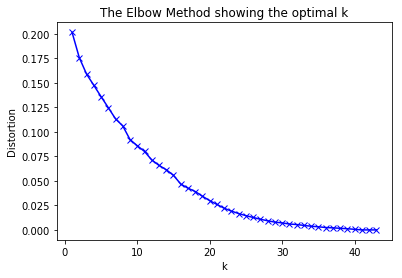

In [73]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,44)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(lahore_grouped_clustering)
    kmeanModel.fit(lahore_grouped_clustering)
    distortions.append(sum(np.min(cdist(lahore_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / lahore_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [74]:
neighborhoods_venues_sorted.drop(columns = 'Cluster Labels', inplace = True)

In [75]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

lahore_merged = df_lahore

lahore_merged = lahore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lahore_merged

Neighborhood  Neighborhood Latitude  \
3494                 SHAHI MOHALLAH              31.586012   
3532                  TIMBER MARKET              31.599041   
3592                  TIMBER MARKET              31.599041   
3481                 SHAHI MOHALLAH              31.586012   
3541                  TIMBER MARKET              31.599041   
3437                 SHAHI MOHALLAH              31.586012   
3483                 SHAHI MOHALLAH              31.586012   
3559                  TIMBER MARKET              31.599041   
3563                  TIMBER MARKET              31.599041   
3445                 SHAHI MOHALLAH              31.586012   
3560                  TIMBER MARKET              31.599041   
3417                 SHAHI MOHALLAH              31.586012   
1605                          JALLO              31.574575   
962                           WAGHA              31.600830   
3636                     JOHAR TOWN              31.460567   
1561                        CHUHANG              31.433100   
1925       LAHORE E.M.E Society P.O              31.438946   
1875       LAHORE E.M.E Society P.O              31.438946   
1559                        CHUHANG              31.433100   
1553                        CHUHANG              31.433100   
1346                    BAHRIA TOWN              31.365070   
477            LAHORE CANTT. G.P.O.              31.576100   
92             C.M.A. CANTT. LAHORE              31.576100   
2046  LAHORE ENGINEERING UNIVERSITY              31.576100   
268                    HARBANS PURA              31.576100   
3045                     MOGHALPURA              31.576100   
2614   LAHORE PUNJAB GOVERNOR HOUSE              31.576100   
4009                        KAMAHAN              31.434082   
345                       KAHNA NAU              31.369200   
597             LAHORE ISMAIL NAGAR              31.451749   
...                             ...                    ...   
2349   LAHORE NEW UNIVERSITY CAMPUS              31.488800   
2534            LAHORE PT & T AUDIT              31.488800   
2726         LAHORE SECONDARY BOARD              31.488800   
1735                KOHINOOR ENERGY              31.263199   
1264                    BAGHBANPURA              31.224200   
3168                        RAIWIND              31.254400   
3158                        RAIWIND              31.254400   
1722                KOHINOOR ENERGY              31.263199   
1546                        CHUHANG              31.433100   
1897       LAHORE E.M.E Society P.O              31.438946   
1836       LAHORE ALLAMA IQBAL TOWN              31.511292   
1177                   AWAN COLONEY              31.507932   
902                        TOWNSHIP              31.449379   
3805                     GREEN TOWN              31.433985   
3997                        KAMAHAN              31.434082   
313                       KAHNA NAU              31.369200   
3386                  SHAHDARA BAGH              31.464900   
1481                     CHAH MIRAN              31.464900   
2241             LAHORE MULTAN ROAD              31.488800   
2542            LAHORE PT & T AUDIT              31.488800   
2720         LAHORE SECONDARY BOARD              31.488800   
2441  LAHORE PMG PUNJAB POST OFFICE              31.488800   
3118                       NAULAKHA              31.579618   
3266               SHAH ALAM MARKET              31.577423   
1832       LAHORE ALLAMA IQBAL TOWN              31.511292   
1203                   AWAN COLONEY              31.507932   
319                       KAHNA NAU              31.369200   
4003                        KAMAHAN              31.434082   
3587                  TIMBER MARKET              31.599041   
3480                 SHAHI MOHALLAH              31.586012   

      Neighborhood Longitude                             Venue  \
3494               74.307484                       کشمیری گیٹ‬   
3532               74.299059                  

In [76]:
lahore_merged.dropna(inplace=True)

In [77]:
lahore_merged['Cluster Labels'] = lahore_merged['Cluster Labels'].astype(int)
lahore_merged.dtypes

Neighborhood               object
Neighborhood Latitude     float64
Neighborhood Longitude    float64
Venue                      object
Venue Latitude            float64
Venue Longitude           float64
Venue Category             object
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
dtype: object

In [33]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lahore_merged['Venue Latitude'],lahore_merged['Venue Longitude'], lahore_merged['Neighborhood'], lahore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [34]:
df4 = lahore_merged.copy()
df4.head

<bound method NDFrame.head of                        Neighborhood  Neighborhood Latitude  \
3494                 SHAHI MOHALLAH              31.586012   
3532                  TIMBER MARKET              31.599041   
3592                  TIMBER MARKET              31.599041   
3481                 SHAHI MOHALLAH              31.586012   
3541                  TIMBER MARKET              31.599041   
3437                 SHAHI MOHALLAH              31.586012   
3483                 SHAHI MOHALLAH              31.586012   
3559                  TIMBER MARKET              31.599041   
3563                  TIMBER MARKET              31.599041   
3445                 SHAHI MOHALLAH              31.586012   
3560                  TIMBER MARKET              31.599041   
3417                 SHAHI MOHALLAH              31.586012   
1605                          JALLO              31.574575   
962                           WAGHA              31.600830   
3636                     JOHAR TOWN     

# Function to return top 5 venues

In [35]:
## Helper Function - Function to Sort Venues in Descending Order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [36]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lahore_grouped['Neighborhood']

for ind in np.arange(lahore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lahore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.shape
print('The dataframe has', neighborhoods_venues_sorted.shape, 'rows and columns respectively.')
neighborhoods_venues_sorted.head()

The dataframe has (44, 6) rows and columns respectively.


Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          AWAN COLONEY   Housing Development             BBQ Joint   
1           BAGHBANPURA               Factory                  Farm   
2           BAHRIA TOWN                Bakery             BBQ Joint   
3                 BARKI           Gas Station         Train Station   
4  C.M.A. CANTT. LAHORE   Housing Development                Mosque   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery        Clothing Store  Fast Food Restaurant  
1                Office     Industrial Estate           Gas Station  
2   Housing Development               Factory            Restaurant  
3           Yoga Studio      Dentist's Office         Event Service  
4           Event Space              Hospital               Factory

In [37]:
lahore_merged = lahore_grouped

# set number of clusters
kclusters = 5

lahore_grouped_clustering = lahore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lahore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 2, 4, 2, 2, 0, 2, 0, 2], dtype=int32)

In [38]:
neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0          AWAN COLONEY   Housing Development             BBQ Joint   
1           BAGHBANPURA               Factory                  Farm   
2           BAHRIA TOWN                Bakery             BBQ Joint   
3                 BARKI           Gas Station         Train Station   
4  C.M.A. CANTT. LAHORE   Housing Development                Mosque   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  
0                Bakery        Clothing Store  Fast Food Restaurant  
1                Office     Industrial Estate           Gas Station  
2   Housing Development               Factory            Restaurant  
3           Yoga Studio      Dentist's Office         Event Service  
4           Event Space              Hospital               Factory

# Let's Examine The Clusters

# Cluster 1 - Frozen Yogurt

In [39]:
df_frozen = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='512e7cae91d4cbb4e5efe0af')

In [40]:
df_frozen

Neighborhood  Neighborhood Latitude  \
0           FEROZEPUR ROAD LAHORE              31.488800   
1           FEROZEPUR ROAD LAHORE              31.488800   
2                    LAHORE G.P.O              31.488800   
3                    LAHORE G.P.O              31.488800   
4              LAHORE MULTAN ROAD              31.488800   
5              LAHORE MULTAN ROAD              31.488800   
6    LAHORE NEW UNIVERSITY CAMPUS              31.488800   
7    LAHORE NEW UNIVERSITY CAMPUS              31.488800   
8   LAHORE PMG PUNJAB POST OFFICE              31.488800   
9   LAHORE PMG PUNJAB POST OFFICE              31.488800   
10            LAHORE PT & T AUDIT              31.488800   
11            LAHORE PT & T AUDIT              31.488800   
12         LAHORE SECONDARY BOARD              31.488800   
13         LAHORE SECONDARY BOARD              31.488800   
14               SHAH ALAM MARKET              31.577423   
15                 SHAHI MOHALLAH              31.586012   

    Neighborhood Longitude                  Venue  Venue Latitude  \
0                74.368600             Yogurberry       31.487098   
1                74.368600      Al noor milk shop       31.492864   
2                74.368600             Yogurberry       31.487098   
3                74.368600      Al noor milk shop       31.492864   
4                74.368600             Yogurberry       31.487098   
5                74.368600      Al noor milk shop       31.492864   
6                74.368600             Yogurberry       31.487098   
7                74.368600      Al noor milk shop       31.492864   
8                74.368600             Yogurberry       31.487098   
9                74.368600      Al noor milk shop       31.492864   
10               74.368600             Yogurberry       31.487098   
11               74.368600      Al noor milk shop       31.492864   
12               74.368600             Yogurberry       31.487098   
13               74.368600      Al noor milk shop       31.492864   
14               74.315594  Allah Waris Milk Shop       31.577727   
15               74.307484  Allah Waris Milk Shop       31.577727   

    Venue Longitude      Venue Category  
0         74.376144  Frozen Yogurt Shop  
1         74.371539  Frozen Yogurt Shop  
2         74.376144  Frozen Yogurt Shop  
3         74.371539  Frozen Yogurt Shop  
4         74.376144  Frozen Yogurt Shop  
5         74.371539  Frozen Yogurt Shop  
6         74.376144  Frozen Yogurt Shop  
7         74.371539  Frozen Yogurt Shop  
8         74.376144  Frozen Yogurt Shop  
9         74.371539  Frozen Yogurt Shop  
10        74.376144  Frozen Yogurt Shop  
11        74.371539  Frozen Yogurt Shop  
12        74.376144  Frozen Yogurt Shop  
13        74.371539  Frozen Yogurt Shop  
14        74.307865  Frozen Yogurt Shop  
15        74.307865  Frozen Yogurt Shop

In [78]:
# function to add markers for given venues to map
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Neighborhood'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [79]:
lahore_venues_forzen = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(df_frozen, 'green', map_lahore_venues_forzen)
map_lahore_venues_forzen

# Cluster 2 - Schools / High Schools

In [80]:
df_schools = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d13b941735')
df_schools

Neighborhood  Neighborhood Latitude  \
0             C.M.A. CANTT. LAHORE              31.576100   
1            FEROZEPUR ROAD LAHORE              31.488800   
2                     HARBANS PURA              31.576100   
3             LAHORE CANTT. G.P.O.              31.576100   
4   LAHORE DEFENCE HOUSING SOICETY              31.481100   
5              LAHORE ISMAIL NAGAR              31.451749   
6                          TAJPURA              31.561545   
7                         TOWNSHIP              31.449379   
8                         TOWNSHIP              31.449379   
9                         TOWNSHIP              31.449379   
10               AITCHESON COLLEGE              31.551728   
11               AITCHESON COLLEGE              31.551728   
12                      CHAH MIRAN              31.464900   
13                      CHAH MIRAN              31.464900   
14                      CHAH MIRAN              31.464900   
15                      CHAH MIRAN              31.464900   
16   LAHORE ENGINEERING UNIVERSITY              31.576100   
17                    LAHORE G.P.O              31.488800   
18              LAHORE MULTAN ROAD              31.488800   
19    LAHORE NEW UNIVERSITY CAMPUS              31.488800   
20   LAHORE PMG PUNJAB POST OFFICE              31.488800   
21             LAHORE PT & T AUDIT              31.488800   
22    LAHORE PUNJAB GOVERNOR HOUSE              31.576100   
23          LAHORE SECONDARY BOARD              31.488800   
24  LAHORE SHADMAN WOMEN MODEL P.O              31.535632   
25  LAHORE SHADMAN WOMEN MODEL P.O              31.535632   
26  LAHORE SHADMAN WOMEN MODEL P.O              31.535632   
27  LAHORE SHADMAN WOMEN MODEL P.O              31.535632   
28                        MANSOORA              31.492752   
29                      MOGHALPURA              31.576100   
30                   SHAHDARA BAGH              31.464900   
31                   SHAHDARA BAGH              31.464900   
32                   SHAHDARA BAGH              31.464900   
33                   SHAHDARA BAGH              31.464900   
34                   TIMBER MARKET              31.599041   
35                      WAPDA TOWN              31.431934   
36                      WAPDA TOWN              31.431934   
37                      WAPDA TOWN              31.431934   
38                      GREEN TOWN              31.433985   
39                      GREEN TOWN              31.433985   
40                      GREEN TOWN              31.433985   
41                     FAISAL TOWN              31.476407   
42                     FAISAL TOWN              31.476407   
43                     FAISAL TOWN              31.476407   
44                     GULBERG III              31.504952   
45                     GULBERG III              31.504952   
46                      GULBERG II              31.526404   
47                      GULBERG II              31.526404   
48                      GULBERG II              31.526404   
49                      GULBERG II              31.526404   
50                      GULBERG II              31.526404   
51                      GULBERG II              31.526404   
52                       GULBERG I              31.530969   
53                       GULBERG I              31.530969   
54                       GULBERG I              31.530969   
55                       GULBERG I              31.530969   
56                       GULBERG I              31.530969   

    Neighborhood Longitude                                    Venue  \
0                74.424700   Lahore Grammar School (Paragon Campus)   
1                74.368600                Beaconhouse School System   
2                74.424700   Lahore Grammar School (Paragon Campus)   
3                74.424700   Lahore Grammar School (Paragon Campus)   
4                74.316400                First Step Islamic School   
5                74.343023              sunrise english h

In [81]:
map_lahore_highschools = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(df_schools, 'black', map_lahore_highschools)
map_lahore_highschools

# Cluster 3 - Colleges & Universities

In [82]:
df_uni = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4d4b7105d754a06372d81259')
df_uni

Neighborhood  Neighborhood Latitude  \
0             FEROZEPUR ROAD LAHORE              31.488800   
1             FEROZEPUR ROAD LAHORE              31.488800   
2             FEROZEPUR ROAD LAHORE              31.488800   
3             FEROZEPUR ROAD LAHORE              31.488800   
4             FEROZEPUR ROAD LAHORE              31.488800   
5             FEROZEPUR ROAD LAHORE              31.488800   
6             FEROZEPUR ROAD LAHORE              31.488800   
7    LAHORE DEFENCE HOUSING SOICETY              31.481100   
8    LAHORE DEFENCE HOUSING SOICETY              31.481100   
9    LAHORE DEFENCE HOUSING SOICETY              31.481100   
10   LAHORE DEFENCE HOUSING SOICETY              31.481100   
11   LAHORE DEFENCE HOUSING SOICETY              31.481100   
12   LAHORE DEFENCE HOUSING SOICETY              31.481100   
13   LAHORE DEFENCE HOUSING SOICETY              31.481100   
14   LAHORE DEFENCE HOUSING SOICETY              31.481100   
15   LAHORE DEFENCE HOUSING SOICETY              31.481100   
16   LAHORE DEFENCE HOUSING SOICETY              31.481100   
17   LAHORE DEFENCE HOUSING SOICETY              31.481100   
18   LAHORE DEFENCE HOUSING SOICETY              31.481100   
19   LAHORE DEFENCE HOUSING SOICETY              31.481100   
20   LAHORE DEFENCE HOUSING SOICETY              31.481100   
21   LAHORE DEFENCE HOUSING SOICETY              31.481100   
22   LAHORE DEFENCE HOUSING SOICETY              31.481100   
23   LAHORE DEFENCE HOUSING SOICETY              31.481100   
24   LAHORE DEFENCE HOUSING SOICETY              31.481100   
25   LAHORE DEFENCE HOUSING SOICETY              31.481100   
26   LAHORE DEFENCE HOUSING SOICETY              31.481100   
27   LAHORE DEFENCE HOUSING SOICETY              31.481100   
28   LAHORE DEFENCE HOUSING SOICETY              31.481100   
29   LAHORE DEFENCE HOUSING SOICETY              31.481100   
..                              ...                    ...   
246                     GULBERG III              31.504952   
247                     GULBERG III              31.504952   
248                     GULBERG III              31.504952   
249                     GULBERG III              31.504952   
250                     GULBERG III              31.504952   
251                     GULBERG III              31.504952   
252                     GULBERG III              31.504952   
253                      GULBERG II              31.526404   
254                      GULBERG II              31.526404   
255                      GULBERG II              31.526404   
256                      GULBERG II              31.526404   
257                      GULBERG II              31.526404   
258                      GULBERG II              31.526404   
259                      GULBERG II              31.526404   
260                      GULBERG II              31.526404   
261                      GULBERG II              31.526404   
262                      GULBERG II              31.526404   
263                      GULBERG II              31.526404   
264                      GULBERG II              31.526404   
265                      GULBERG II              31.526404   
266                       GULBERG I              31.530969   
267                       GULBERG I              31.530969   
268                       GULBERG I              31.530969   
269                       GULBERG I              31.530969   
270                       GULBERG I              31.530969   
271                       GULBERG I              31.530969   
272                       GULBERG I              31.530969   
273                       GULBERG I              31.530969   
274                       GULBERG I              31.530969   
275                       GULBERG I              31.530969   

     Neighborhood Longitude  \
0                 74.368600   
1                 74.368600   
2                 74.368600   
3                 74.368600   
4                 74.36

In [83]:
map_lahore_uni = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(df_uni, 'orange', map_lahore_uni)
map_lahore_uni

# Cluster 4 - Offices

In [84]:
df_office = getNearbyVenues(names=df3['Neighborhood'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d124941735')
df_office.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  FEROZEPUR ROAD LAHORE                31.4888                 74.3686   
1  FEROZEPUR ROAD LAHORE                31.4888                 74.3686   
2  FEROZEPUR ROAD LAHORE                31.4888                 74.3686   
3  FEROZEPUR ROAD LAHORE                31.4888                 74.3686   
4  FEROZEPUR ROAD LAHORE                31.4888                 74.3686   

                      Venue  Venue Latitude  Venue Longitude   Venue Category  
0                Faysalbank       31.493192        74.372731           Office  
1               Platalytics       31.478525        74.373291           Office  
2                Innovation       31.493394        74.376757  Coworking Space  
3                 SMC Group       31.493932        74.375921           Office  
4  Fatima Group Head Office       31.494117        74.375747           Office

In [85]:
map_lahore_office = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(df_office, 'purple', map_lahore_office)
map_lahore_office

In [86]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('Neighborhood').count()
    
    for n in startDf['Neighborhood']:
        try:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['Neighborhood'] == n,columnTitle] = 0

In [87]:
df_data = df3.copy()
df_data.rename(columns={'Neighborhood':'Neighborhood'}, inplace=True)
addColumn(df_data, 'Frozen Yogurt Shop', df_frozen)
addColumn(df_data, 'Schools', df_schools)
addColumn(df_data, 'Colleges & Universities', df_uni)
addColumn(df_data, 'Offices', df_office)
df_data

Neighborhood  Postal Code   Latitude  Longitude  \
0                         BATA PUR        53400  33.238200  72.834700   
1             C.M.A. CANTT. LAHORE        54800  31.576100  74.424700   
2            FEROZEPUR ROAD LAHORE        54600  31.488800  74.368600   
3                     HARBANS PURA        54850  31.576100  74.424700   
4                        KAHNA NAU        53100  31.369200  74.365300   
5             LAHORE CANTT. G.P.O.        54810  31.576100  74.424700   
6   LAHORE DEFENCE HOUSING SOICETY        54792  31.481100  74.316400   
7              LAHORE ISMAIL NAGAR        54760  31.451749  74.343023   
8                MODEL TOWN LAHORE        54700  31.484400  74.324400   
9                          TAJPURA        54870  31.561545  74.397274   
10                        TOWNSHIP        54770  31.449379  74.290708   
11                           WAGHA        53600  31.600830  74.558052   
12               AITCHESON COLLEGE        54030  31.551728  74.344053   
13                          ALFLAH        54020  31.480809  74.412262   
14                    AWAN COLONEY        54780  31.507932  74.258842   
15                     BAGHBANPURA        54920  31.224200  74.099700   
16                     BAHRIA TOWN        53720  31.365070  74.145976   
17                         BALLOKI        55210  31.188976  73.874344   
18                           BARKI        53200  31.047800  74.085000   
19                      CHAH MIRAN        54900  31.464900  74.384600   
20                         CHUHANG        53800  31.433100  74.174200   
21                           JALLO        53500  31.574575  74.490081   
22                 KOHINOOR ENERGY        55160  31.263199  74.185293   
23        LAHORE ALLAMA IQBAL TOWN        54570  31.511292  74.266660   
24        LAHORE E.M.E Society P.O        53710  31.438946  74.191477   
25   LAHORE ENGINEERING UNIVERSITY        54890  31.576100  74.424700   
26                    LAHORE G.P.O        54000  31.488800  74.368600   
27              LAHORE MULTAN ROAD        54500  31.488800  74.368600   
28    LAHORE NEW UNIVERSITY CAMPUS        54590  31.488800  74.368600   
29   LAHORE PMG PUNJAB POST OFFICE        54560  31.488800  74.368600   
30             LAHORE PT & T AUDIT        54550  31.488800  74.368600   
31    LAHORE PUNJAB GOVERNOR HOUSE        54880  31.576100  74.424700   
32          LAHORE SECONDARY BOARD        54650  31.488800  74.368600   
33  LAHORE SHADMAN WOMEN MODEL P.O        54610  31.535632  74.320718   
34                     MANGA MANDI        55270  31.304400  74.063600   
35                        MANSOORA        54790  31.492752  74.264180   
36                      MOGHALPURA        54840  31.576100  74.424700   
37                        NAULAKHA        54010  31.579618  74.325044   
38                 NIAZ BEG THOKAR        53700  31.442500  73.883000   
39                         RAIWIND        55150  31.254400  74.217800   
40                SHAH ALAM MARKET        54100  31.577423  74.315594   
41                   SHAHDARA BAGH        54950  31.464900  74.384600   
42                  SHAHI MOHALLAH        54110  31.586012  74.307484   
43                   TIMBER MARKET        54120  31.599041  74.299059   
44                      JOHAR TOWN        54782  31.460567  74.221317   
45                      WAPDA TOWN        54770  31.431934  74.244238   
46                      GREEN TOWN        53101  31.433985  74.302484   
47                     FAISAL TOWN        54770  31.476407  74.296872   
48                         KAMAHAN        53101  31.434082  74.383294   
49                     GULBERG III        54660  31.504952  74.325749   
50                      GULBERG II        54660  31.526404  74.339798   
51                       GULBERG I        54660  31.530969  74.342183   

    Frozen Yogurt Shop  Schools  Colleges & Universities  Offices  
0                  0.0      0.0                      0.0      0.0  
1               

In [88]:
# negative weight, because YOGEN FRÜZ wants to open a Frozen Yogurt Point and thus wants to avoid concurrence as much as possible
weight_fyog = -1

# positive weight, because high school students are good customers
weight_schools = 1

# positive weight, because uni students are good customers
weight_uni = 1.5

# positive weight because employees are even better customers
weight_offices = 2

In [89]:
df_weighted = df_data[['Neighborhood']].copy()

In [90]:
df_weighted['Score'] = df_data['Frozen Yogurt Shop'] * weight_fyog + df_data['Schools'] * weight_schools + df_data['Colleges & Universities'] * weight_uni + df_data['Offices'] * weight_offices
df_weighted = df_weighted.sort_values(by=['Score'], ascending=False)
df_weighted

Neighborhood  Score
47                     FAISAL TOWN  124.5
50                      GULBERG II  121.5
49                     GULBERG III  120.0
51                       GULBERG I  114.0
6   LAHORE DEFENCE HOUSING SOICETY  109.5
33  LAHORE SHADMAN WOMEN MODEL P.O   80.0
41                   SHAHDARA BAGH   75.0
19                      CHAH MIRAN   75.0
10                        TOWNSHIP   57.5
12               AITCHESON COLLEGE   49.5
40                SHAH ALAM MARKET   47.0
8                MODEL TOWN LAHORE   44.5
32          LAHORE SECONDARY BOARD   37.5
30             LAHORE PT & T AUDIT   37.5
29   LAHORE PMG PUNJAB POST OFFICE   37.5
28    LAHORE NEW UNIVERSITY CAMPUS   37.5
27              LAHORE MULTAN ROAD   37.5
26                    LAHORE G.P.O   37.5
2            FEROZEPUR ROAD LAHORE   37.5
13                          ALFLAH   34.0
37                        NAULAKHA   29.5
42                  SHAHI MOHALLAH   13.0
46                      GREEN TOWN   10.5
44                      JOHAR TOWN   10.0
35                        MANSOORA    8.5
24        LAHORE E.M.E Society P.O    8.0
23        LAHORE ALLAMA IQBAL TOWN    6.5
20                         CHUHANG    5.5
7              LAHORE ISMAIL NAGAR    4.5
45                      WAPDA TOWN    3.0
9                          TAJPURA    2.5
22                 KOHINOOR ENERGY    2.0
4                        KAHNA NAU    2.0
5             LAHORE CANTT. G.P.O.    1.0
31    LAHORE PUNJAB GOVERNOR HOUSE    1.0
3                     HARBANS PURA    1.0
1             C.M.A. CANTT. LAHORE    1.0
36                      MOGHALPURA    1.0
25   LAHORE ENGINEERING UNIVERSITY    1.0
43                   TIMBER MARKET    1.0
48                         KAMAHAN    0.0
18                           BARKI    0.0
39                         RAIWIND    0.0
38                 NIAZ BEG THOKAR    0.0
17                         BALLOKI    0.0
34                     MANGA MANDI    0.0
11                           WAGHA    0.0
14                    AWAN COLONEY    0.0
15                     BAGHBANPURA    0.0
16                     BAHRIA TOWN    0.0
21                           JALLO    0.0
0                         BATA PUR    0.0

In [92]:
map_bog_result = folium.Map(location=[latitude, longitude], zoom_start=15)

bog_win = df3[df3['Neighborhood'] == 'FAISAL TOWN']

for lat, lng, local in zip(bog_win['Latitude'], bog_win['Longitude'], bog_win['Neighborhood']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_bog_result) 

addToMap(df_frozen[df_frozen['Neighborhood'] == 'FAISAL TOWN'], 'red', map_bog_result)
addToMap(df_schools[df_schools['Neighborhood'] == 'FAISAL TOWN'], 'green', map_bog_result)
addToMap(df_uni[df_uni['Neighborhood'] == 'FAISAL TOWN'], 'gold', map_bog_result)
addToMap(df_office[df_office['Neighborhood'] == 'FAISAL TOWN'], 'fuchsia', map_bog_result)

map_bog_result